In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:


def simulate_investment(final_investment, num_years, real_return, standard_deviation, monthly_contribution, increase_saving_rate):
    """
    Simulates the growth of an investment over a given number of years.

    Parameters:
    final_investment (float): The initial amount of investment.
    num_years (int): The number of years to simulate.
    real_return (float): The expected annual real return rate (as a decimal).
    standard_deviation (float): The standard deviation of the return.
    monthly_contribution (float): The fixed monthly contribution.
    increase_saving_rate (float): The annual inflation rate (as a decimal).

    Returns:
    float: The final value of the investment after the simulation.
    """
    for year in range(num_years):
        for month in range(12):
            monthly_return = np.random.normal(real_return / 12, standard_deviation / np.sqrt(12))
            final_investment *= (1 + monthly_return)
            if year > 0 and month == 0:  # Adjust contribution annually
                monthly_contribution *= (1 + increase_saving_rate)
            final_investment += monthly_contribution

    return final_investment


# Constants - These are based on historical S&P 500 data
AVERAGE_RETURN = 0.095  # This is the nominal return
INFLATION_RATE = 0.03  # This is the inflation rate
REAL_RETURN = ((1+AVERAGE_RETURN)/(1+INFLATION_RATE))-1 #AVERAGE_RETURN - INFLATION_RATE  # This is the real return, adjusted for inflation
print(REAL_RETURN)
STANDARD_DEVIATION = 0.25
NUM_SIMULATIONS = 10000
NUM_YEARS = 15
INITIAL_INVESTMENT = 2_173_000
MONTHLY_CONTRIBUTION = 15_972.77 
# Perform the simulations
simulations = []
for _ in range(NUM_SIMULATIONS):
    final_investment = simulate_investment(INITIAL_INVESTMENT, NUM_YEARS, REAL_RETURN, STANDARD_DEVIATION, MONTHLY_CONTRIBUTION, 0.0)
    simulations.append(final_investment)



0.06310679611650483


Shape: 0.7447743445233942, Loc: 0.0, Scale: 7668468.230415013
10th percentile: $2,952,493.77
50th percentile: $7,668,468.23
80th percentile: $14,352,652.79


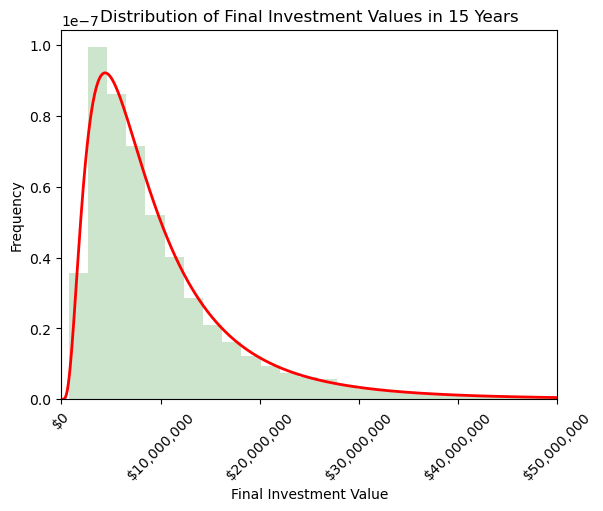

In [32]:
#fit an log normal distribution to the simulations data
from scipy.stats import lognorm
shape, loc, scale = lognorm.fit(simulations, floc=0)
print(f"Shape: {shape}, Loc: {loc}, Scale: {scale}")
#calculate the 10th and 90th percentile
print(f"10th percentile: ${lognorm.ppf(0.1, shape, loc=loc, scale=scale):,.2f}")
print(f"50th percentile: ${lognorm.ppf(0.5, shape, loc=loc, scale=scale):,.2f}")
print(f"80th percentile: ${lognorm.ppf(0.8, shape, loc=loc, scale=scale):,.2f}")

#graph the distribution on the simulations data
x = np.linspace(0, 50_000_000, 1000)
plt.hist(simulations, bins=100, density=True, alpha=0.2, color='g')
plt.plot(x, lognorm.pdf(x, shape, loc=loc, scale=scale), 'r', linewidth=2)
plt.xlabel('Final Investment Value')
plt.ylabel('Frequency')
plt.title('Distribution of Final Investment Values in {} Years'.format(NUM_YEARS))
#conver x axis to dolar amounts
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
#rotate x axis labels
plt.xticks(rotation=45)
plt.xlim(0, 50_000_000)
plt.show()

## Rental simulations

Shape: 0.04716040402562577, Loc: 0.0, Scale: 1265597.8698378664
10th percentile: $1,191,372.67
50th percentile: $1,265,597.87
80th percentile: $1,316,841.19


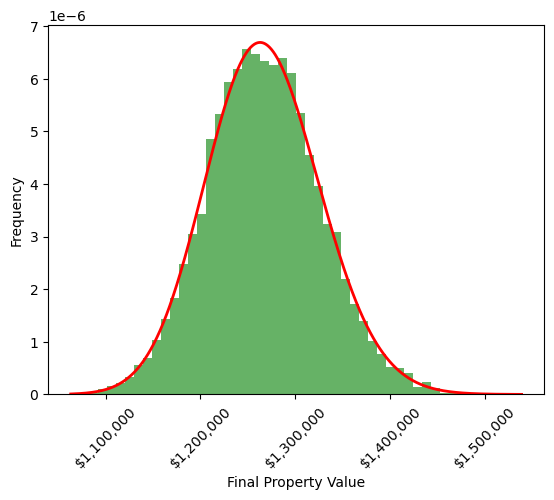

In [4]:

# Set initial values
initial_rent = 5000  # The initial monthly rent
avg_annual_rent_increase = 0.025  # The expected average annual rent increase
std_dev_rent_increase = 0.01  # Standard deviation of rent increase
annual_maintenance_cost_rate = 0.01  # Annual maintenance cost as a percentage of property value
property_value = 900000  # Initial property value
avg_property_appreciation = 0.04  # Average annual property appreciation
std_dev_property_appreciation = 0.015  # Standard deviation of property appreciation
vacancy_rate = 0.1  # Expected vacancy rate
tax_rate = 0.3  # Tax rate on rental income
inflation_rate = INFLATION_RATE  # The expected annual inflation rate
years = 10  # The number of years for the projection
num_simulations = 10000  # Number of Monte Carlo simulations
monthly_mortgage_payment = 5000  # The monthly mortgage payment


def simulate_property_value_and_income(property_value, annual_rent, num_years, avg_annual_rent_increase, std_dev_rent_increase, annual_maintenance_cost_rate, avg_property_appreciation, std_dev_property_appreciation, vacancy_rate, tax_rate, inflation_rate):
    year = 0
    while year < num_years:
        for month in range(12):
            # Simulate the monthly rent increase
            monthly_rent_increase = np.random.normal(avg_annual_rent_increase / 12, std_dev_rent_increase / np.sqrt(12))
            annual_rent *= (1 + monthly_rent_increase)

            # Calculate the monthly maintenance cost
            monthly_maintenance_cost = property_value * annual_maintenance_cost_rate / 12

            # Calculate the net monthly income
            net_monthly_income = annual_rent * (1 - vacancy_rate) / 12 - monthly_maintenance_cost - monthly_mortgage_payment

            # Apply tax
            net_monthly_income_after_tax = net_monthly_income * (1 - tax_rate)

            # Adjust for inflation and add to the property value
            property_value += net_monthly_income_after_tax / ((1 + inflation_rate) ** (year + month / 12))

            # Simulate the monthly property appreciation
            monthly_property_appreciation = np.random.normal(avg_property_appreciation / 12, std_dev_property_appreciation / np.sqrt(12))
            property_value *= (1 + monthly_property_appreciation)
        
        year += 1

    return property_value

# Perform the simulations
simulations = []
for _ in range(num_simulations):
    final_property_value = simulate_property_value_and_income(property_value, initial_rent * 12, years, avg_annual_rent_increase, std_dev_rent_increase, annual_maintenance_cost_rate, avg_property_appreciation, std_dev_property_appreciation, vacancy_rate, tax_rate, inflation_rate)
    simulations.append(final_property_value)

# Fit a log normal distribution to the simulations data
shape, loc, scale = lognorm.fit(simulations, floc=0)
print(f"Shape: {shape}, Loc: {loc}, Scale: {scale}")

# Calculate the 10th, 50th, and 80th percentile
print(f"10th percentile: ${lognorm.ppf(0.1, shape, loc=loc, scale=scale):,.2f}")
print(f"50th percentile: ${lognorm.ppf(0.5, shape, loc=loc, scale=scale):,.2f}")
print(f"80th percentile: ${lognorm.ppf(0.8, shape, loc=loc, scale=scale):,.2f}")

# Graph the distribution on the simulations data
x = np.linspace(min(simulations), max(simulations), 1000)
plt.hist(simulations, bins=50, density=True, alpha=0.6, color='g')
plt.plot(x, lognorm.pdf(x, shape, loc=loc, scale=scale), 'r', linewidth=2)
plt.xlabel('Final Property Value')
plt.ylabel('Frequency')

# Convert x axis to dollar amounts
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

# Rotate x axis labels
plt.xticks(rotation=45)
plt.show()


In [19]:
5_500_000*.035

192500.00000000003

Combine simulations

Shape: 0.2533636653138005, Loc: 0.0, Scale: 1997553.286616656
10th percentile: $1,443,721.96
50th percentile: $1,997,553.29
80th percentile: $2,472,325.77


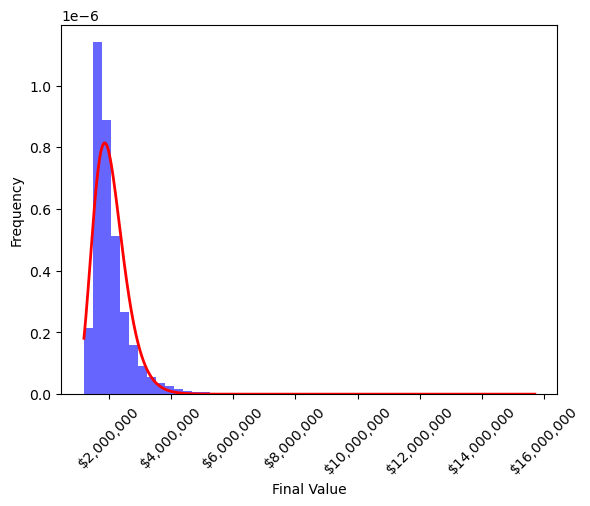

In [5]:

# Perform the simulations
total_sims = []
for _ in range(50000):
    final_property_value = simulate_property_value_and_income(property_value, initial_rent * 12, years, avg_annual_rent_increase, std_dev_rent_increase, annual_maintenance_cost_rate, avg_property_appreciation, std_dev_property_appreciation, vacancy_rate, tax_rate, inflation_rate)
    final_investment = simulate_investment(INITIAL_INVESTMENT, NUM_YEARS, REAL_RETURN, STANDARD_DEVIATION, MONTHLY_CONTRIBUTION)
    total_sims.append(final_investment+final_property_value)

# Fit a log normal distribution to the simulations data
shape, loc, scale = lognorm.fit(total_sims, floc=0)
print(f"Shape: {shape}, Loc: {loc}, Scale: {scale}")

# Calculate the 10th, 50th, and 80th percentile
print(f"10th percentile: ${lognorm.ppf(0.1, shape, loc=loc, scale=scale):,.2f}")
print(f"50th percentile: ${lognorm.ppf(0.5, shape, loc=loc, scale=scale):,.2f}")
print(f"80th percentile: ${lognorm.ppf(0.8, shape, loc=loc, scale=scale):,.2f}")

# Graph the distribution on the simulations data
x = np.linspace(min(total_sims), max(total_sims), 1000)
plt.hist(total_sims, bins=50, density=True, alpha=0.6, color='b')
plt.plot(x, lognorm.pdf(x, shape, loc=loc, scale=scale), 'r', linewidth=2)
plt.xlabel('Final Value')
plt.ylabel('Frequency')

# Convert x axis to dollar amounts
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

# Rotate x axis labels
plt.xticks(rotation=45)
plt.show()


## Income Simulation    

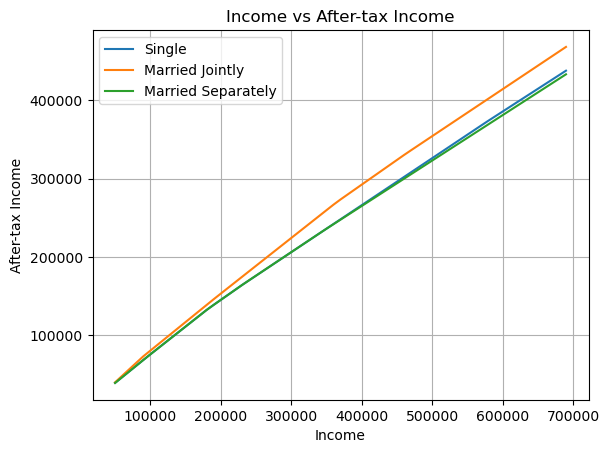

In [6]:
import matplotlib.pyplot as plt
class Account:
    def __init__(self, balance, contribution, growth_rate):
        self.balance = balance
        self.contribution = contribution
        self.growth_rate = growth_rate

class Taxpayer:
    def __init__(self, income, tax_info, accounts):
        self.income = income
        self.tax_info = tax_info
        self.accounts = accounts  # list of Account objects


    def calculate_tax(self):
        total_tax = self.tax_info.calculate_bracket_tax(self.income)
        total_tax += self.income * self.tax_info.state_rate
        return total_tax

    def calculate_retirement_contributions(self):
        contributions = 0
        for account in self.accounts:
            contributions += account.contribution
        return contributions

    def calculate_after_tax_income(self):
        income_after_tax = self.income - self.calculate_tax()
        income_after_contributions = income_after_tax - self.calculate_retirement_contributions()
        return income_after_contributions

class TaxInfo:
    def __init__(self, state_rate, tax_brackets):
        self.state_rate = state_rate
        self.tax_brackets = tax_brackets  # expected a dictionary {income: (base_tax, rate)}

    def calculate_bracket_tax(self, income):
        tax = 0
        brackets = list(self.tax_brackets.keys())
        brackets.sort(reverse=True)

        for bracket in brackets:
            if income > bracket:
                base_tax, rate = self.tax_brackets[bracket]
                tax = base_tax + rate * (income - bracket)
                break

        return tax

# tax brackets information
single_filers = {
    578125: (174238.25, 0.37),
    231250: (52832, 0.35),
    182100: (37104, 0.32),
    95375: (16290, 0.24),
    44725: (5147, 0.22),
    11000: (1100, 0.12),
    0: (0, 0.10)
}

married_jointly = {
    693750: (186601.5, 0.37),
    462500: (105664, 0.35),
    364200: (74208, 0.32),
    190750: (32580, 0.24),
    89450: (10294, 0.22),
    22000: (2200, 0.12),
    0: (0, 0.10)
}

married_separately = {
    346875: (93300.75, 0.37),
    231250: (52832, 0.35),
    182100: (37104, 0.32),
    95375: (16290, 0.24),
    44725: (5147, 0.22),
    11000: (1100, 0.12),
    0: (0, 0.10)
}

# Define retirement accounts
retirement_accounts = [
    Account(5000, 1000, 0.07),  # 401k
    Account(3000, 500, 0.07),   # IRA
    Account(2000, 500, 0.07)    # Roth IRA
]

# Generate income vs after-tax income
incomes = list(range(50000, 700000, 10000))

tax_tables = {"Single": single_filers, "Married Jointly": married_jointly, "Married Separately": married_separately}

for label, tax_table in tax_tables.items():
    after_tax_incomes = []
    tax_info = TaxInfo(0.05, tax_table)

    for income in incomes:
        taxpayer = Taxpayer(income, tax_info, retirement_accounts)
        after_tax_incomes.append(taxpayer.calculate_after_tax_income())

    # Plot
    plt.plot(incomes, after_tax_incomes, label=label)

plt.xlabel('Income')
plt.ylabel('After-tax Income')
plt.title('Income vs After-tax Income')
plt.legend()
plt.grid(True)
plt.show()


# Maximum 401K contributions

In [21]:
MAX_LIMIT = 22500
# define company information
company1_salary = 150546.25
company2_salary = 160000
# company3_salary = 145000


In [22]:
def calculate_match(contribution, salary, company):
    
    """
    Calculate the match amount based on the contribution amount and the company's match policy
    contrinution: the amount of contribution in dollars
    company: the company's match policy, 1 or 2
    """
    contribution_pct = contribution / salary
    
    if company == 1:
        base_match = 0.05*salary
        additional_match = min(contribution_pct*salary, 0.05*salary)
        return base_match + additional_match
    elif company == 2:
        return min(contribution_pct*salary, 0.04*salary)
    # elif company == 3:
    #     base_match = min(contribution_pct*salary, 0.04*salary)
    #     left_over = min(max((contribution - base_match)/salary, 0), 0.02) * salary
    #     return base_match + left_over

In [29]:


possible_contributions_c1 = np.linspace(0, MAX_LIMIT, 100)
possible_contributions_c2 = MAX_LIMIT - possible_contributions_c1

# calculate the match for each contribution amount
company1_match = np.array([calculate_match(contribution, company1_salary, 1) for contribution in possible_contributions_c1])
company2_match = np.array([calculate_match(contribution, company2_salary, 2) for contribution in possible_contributions_c2])

# calculate the total match
total_match = company1_match + company2_match

#find max total match
max_match = max(total_match)
max_match_index = np.argmax(total_match)

#find the contribution amount that gives the max total match
max_match_contribution = possible_contributions_c1[max_match_index]
max_match_contribution_c2 = possible_contributions_c2[max_match_index]

print(f"for the maximum match of ${max_match:,.2f}, contribute ${max_match_contribution/26:,.2f} per paycheck to company 1 and ${max_match_contribution_c2/24:,.2f} per paycheck to company 2")

print(f"for the maximum match of ${max_match:,.2f}, contribute ${100*(max_match_contribution/company1_salary):,.2f}% to company 1 and ${(max_match_contribution_c2/company2_salary)*100:,.2f}% to company 2")

print(f"The total contribution is ${max_match_contribution+max_match_contribution_c2:,.2f}")

print(f"match for company 1: ${company1_match[max_match_index]/26:,.2f}")
print(f"match for company 2: ${company2_match[max_match_index]/24:,.2f}")

for the maximum match of $21,454.62, contribute $297.20 per paycheck to company 1 and $615.53 per paycheck to company 2
for the maximum match of $21,454.62, contribute $5.13% to company 1 and $9.23% to company 2
The total contribution is $22,500.00
match for company 1: $579.02
match for company 2: $266.67


In [8]:
# 2 401K + match1 + match2 + 2 IRAs
23000*2+21300+.04*80000+2*7000


84500.0

In [9]:
15000*12 - (23000*2+21300+.04*80000+2*7000)

95500.0

In [10]:
95500.0/12


7958.333333333333

In [17]:
total_market_investments = max_match+max_match_contribution+max_match_contribution_c2
total_market_investments

44800.0

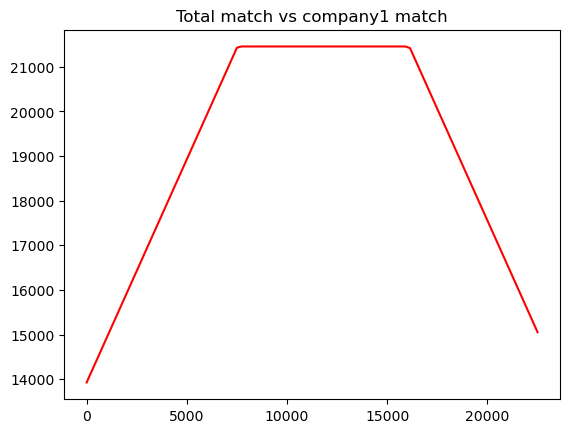

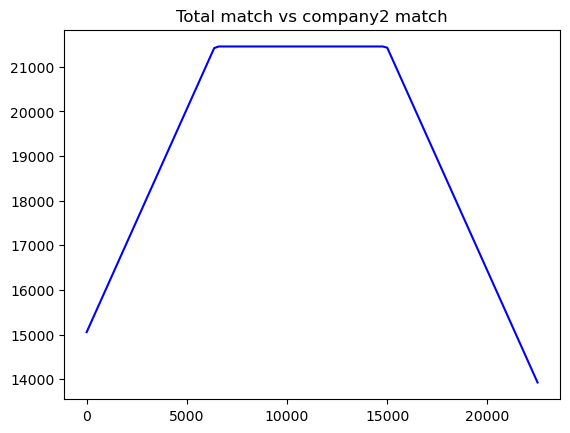

In [25]:
#plot total_match by company1_match
plt.plot(possible_contributions_c1, total_match, color='r')
plt.title('Total match vs company1 match')
plt.show()
#plot total_match by company2_match
plt.plot(possible_contributions_c2, total_match, color='b')
plt.title('Total match vs company2 match')
plt.show()

# Simple Growth projection

In [2]:
def calculate_future_value(principal, monthly_contribution, annual_interest_rate, years):
    monthly_interest_rate = annual_interest_rate / 12 / 100
    months = years * 12

    future_value = principal
    for _ in range(months):
        future_value += future_value * monthly_interest_rate + monthly_contribution

    return future_value




In [10]:
# Input values
initial_principal = 2_090_000  # $1,000,000
monthly_contribution = 400000/12  # $10,000
annual_interest_rate = 6.5  # 6.5% Conservatively, accounting for 3% inflation and only 9% annual return (stocks market average)
years = 10


# Calculate future value
future_value = calculate_future_value(initial_principal, monthly_contribution, annual_interest_rate, years)
print(f"Future value after {years} years: ${future_value:.2f}")

Future value after 10 years: $9609902.52
